In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv(r"C:\Users\Dhairya Bhatt\Desktop\Car details v3.csv")

In [3]:
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
cars.describe()

,year,selling_price,km_driven,seats
count,8040.000000,8.040000e+03,8.040000e+03,7819.000000
mean,2013.809950,6.422738e+05,6.976148e+04,5.421281
std,4.045174,8.096631e+05,5.663073e+04,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,2.000000
25%,2011.000000,2.597500e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8040 non-null   object 
 1   year           8040 non-null   float64
 2   selling_price  8040 non-null   float64
 3   km_driven      8040 non-null   float64
 4   fuel           8040 non-null   object 
 5   seller_type    8040 non-null   object 
 6   transmission   8040 non-null   object 
 7   owner          8040 non-null   object 
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7825 non-null   object 
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


In [6]:
cars.isnull().sum()

name              88
year              88
selling_price     88
km_driven         88
fuel              88
seller_type       88
transmission      88
owner             88
mileage          309
engine           309
max_power        303
torque           309
seats            309
dtype: int64

In [7]:
cars.dropna(inplace=True)

In [8]:
cars.duplicated().sum()

1188

In [9]:
cars.drop_duplicates(inplace=True)

In [10]:
cars.isnull().sum()
cars.duplicated().sum()

0

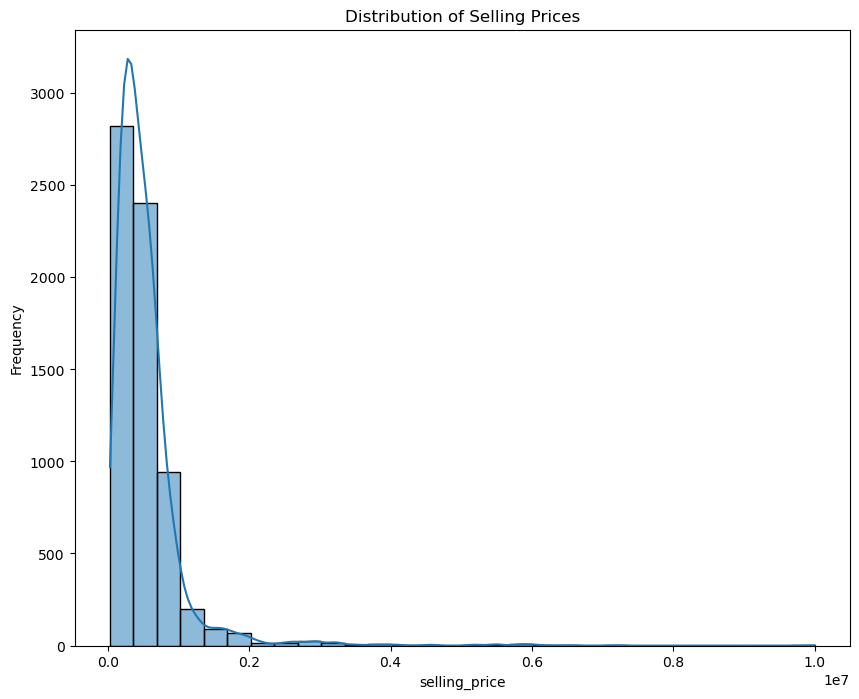

In [11]:
plt.figure(figsize=(10, 8))
sns.histplot(cars['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.show()

In [12]:
cars['brand'] = cars['name'].str.split().str[0]

In [13]:
print(cars[['name', 'brand']].head(10))

                                    name    brand
0                 Maruti Swift Dzire VDI   Maruti
1           Skoda Rapid 1.5 TDI Ambition    Skoda
2               Honda City 2017-2020 EXi    Honda
3              Hyundai i20 Sportz Diesel  Hyundai
4                 Maruti Swift VXI BSIII   Maruti
5          Hyundai Xcent 1.2 VTVT E Plus  Hyundai
7                     Maruti 800 DX BSII   Maruti
8                       Toyota Etios VXD   Toyota
9   Ford Figo Diesel Celebration Edition     Ford
10       Renault Duster 110PS Diesel RxL  Renault


In [14]:
cars['brand'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

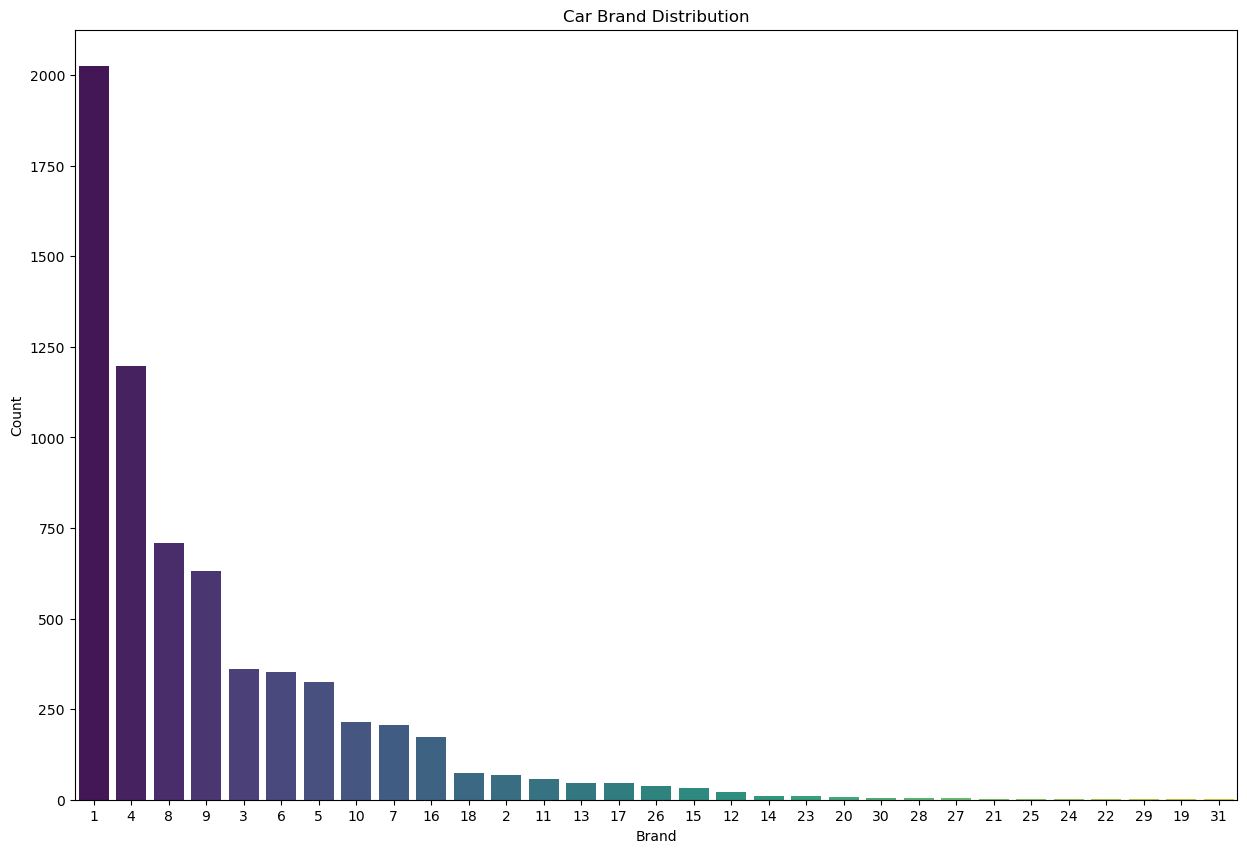

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(data=cars, x='brand', order=cars['brand'].value_counts().index, palette='viridis')
plt.title("Car Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

In [16]:
cars.drop(columns=['torque'], inplace=True)
cars.drop(columns=['name'], inplace=True)

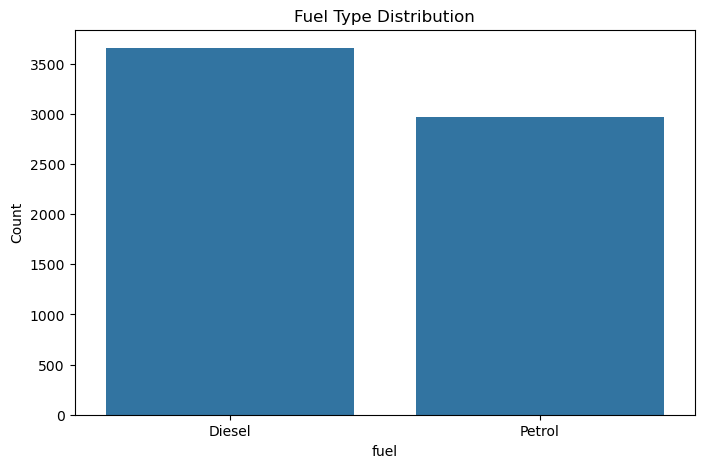

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fuel', data=cars)
plt.title('Fuel Type Distribution')
plt.xlabel('fuel')
plt.ylabel('Count')
plt.show()

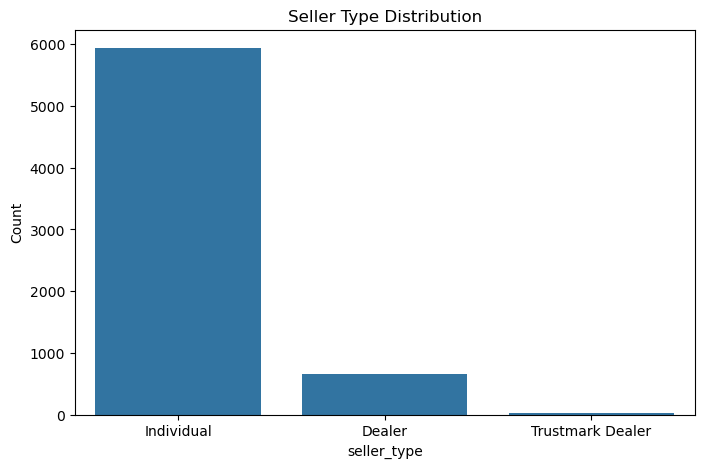

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='seller_type', data=cars)
plt.title('Seller Type Distribution')
plt.xlabel('seller_type')
plt.ylabel('Count')
plt.show()

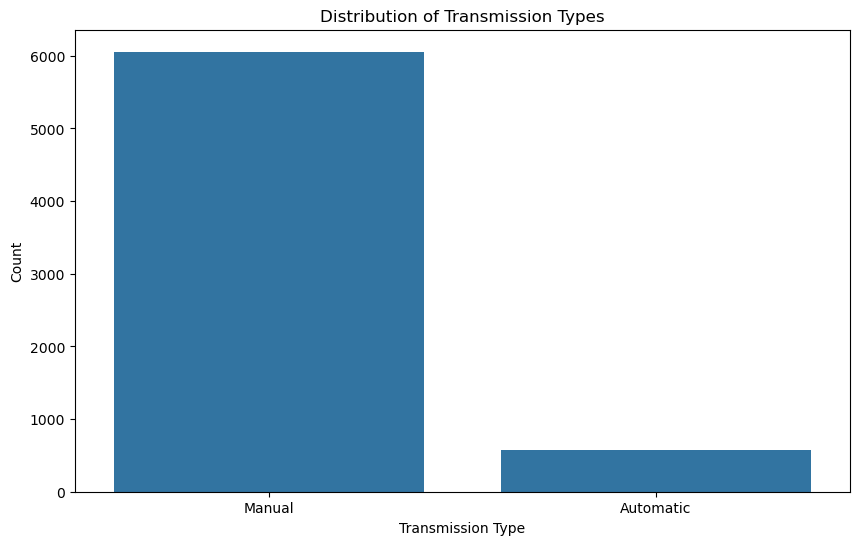

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cars, x='transmission')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

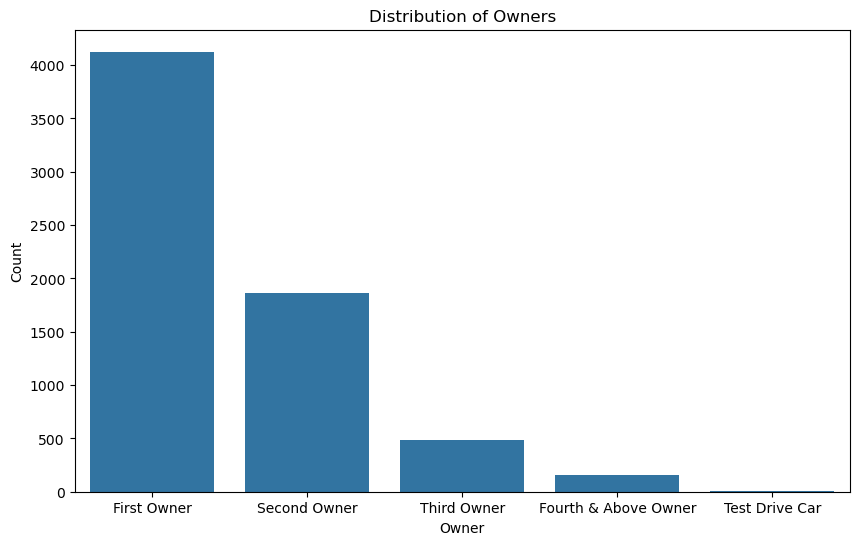

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cars, x='owner')
plt.title('Distribution of Owners')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()

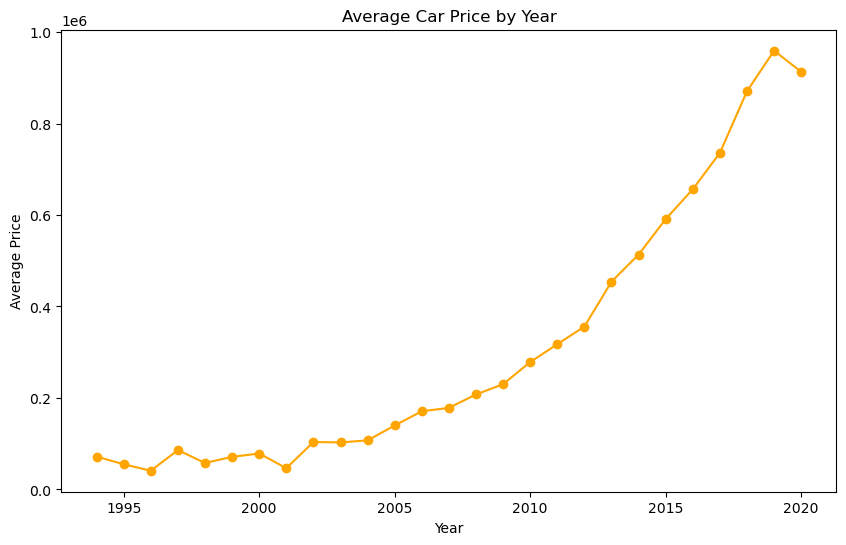

In [29]:
plt.figure(figsize=(10, 6))
cars.groupby('year')['selling_price'].mean().plot(kind='line', marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Car Price by Year')
plt.show()

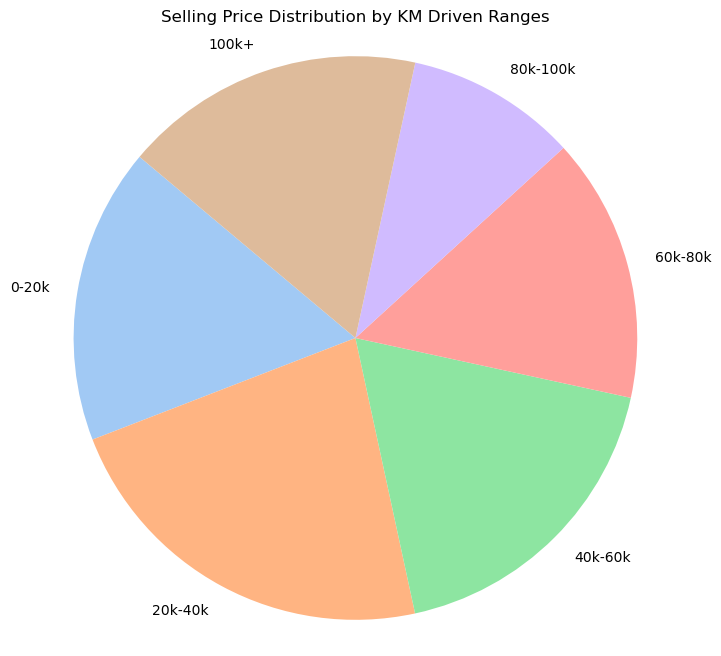

In [38]:
bins = [0, 20000, 40000, 60000, 80000, 100000, np.inf]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

cars['km_category'] = pd.cut(cars['km_driven'], bins=bins, labels=labels)

price_by_km_category = cars.groupby('km_category')['selling_price'].sum()

plt.figure(figsize=(8, 8))
plt.pie(price_by_km_category, labels=price_by_km_category.index, startangle=140, colors=sns.color_palette('pastel'))
plt.title('Selling Price Distribution by KM Driven Ranges')
plt.axis('equal')  
plt.show()

In [45]:
cars.drop(columns=['km_category'], inplace=True)

In [46]:
label_encoder = LabelEncoder()
cars['fuel'] = label_encoder.fit_transform(cars['fuel'])
cars['seller_type'] = label_encoder.fit_transform(cars['seller_type'])
cars['transmission'] = label_encoder.fit_transform(cars['transmission'])
cars['owner'] = label_encoder.fit_transform(cars['owner'])
cars['mileage'] = label_encoder.fit_transform(cars['mileage'])
cars['engine'] = label_encoder.fit_transform(cars['engine'])
cars['max_power'] = label_encoder.fit_transform(cars['max_power'])

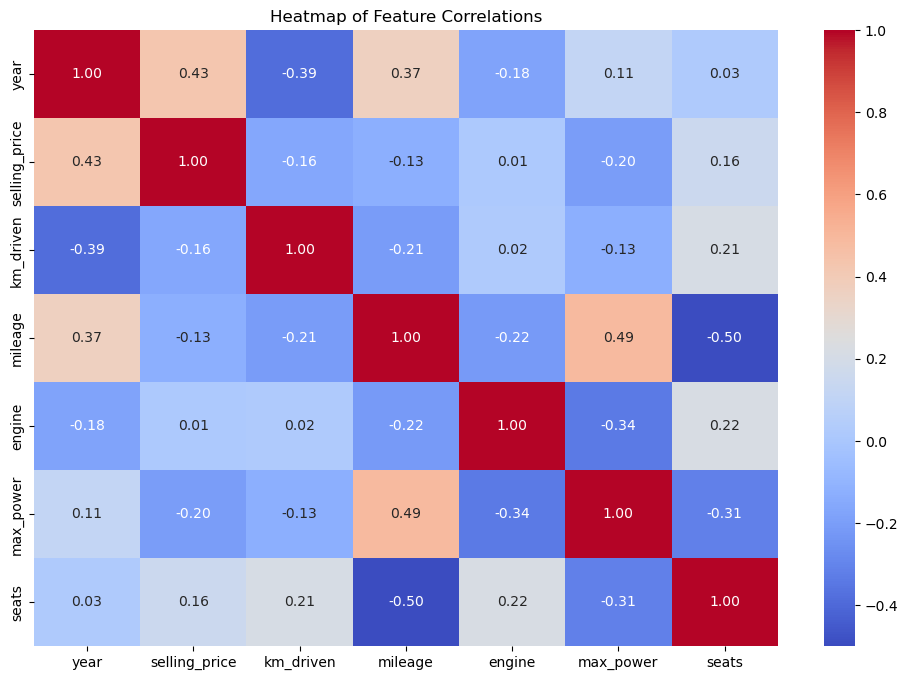

In [47]:
plt.figure(figsize=(12, 8))
correlation_matrix = cars[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

In [48]:
cars.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014.0,450000.0,145500.0,0,1,1,0,318,13,231,5.0,1
1,2014.0,370000.0,120000.0,0,1,1,2,270,36,13,5.0,2
2,2006.0,158000.0,140000.0,1,1,1,4,171,35,240,5.0,3
3,2010.0,225000.0,127000.0,0,1,1,0,310,24,283,5.0,4
4,2007.0,130000.0,120000.0,1,1,1,0,129,14,274,5.0,1
5,2017.0,440000.0,45000.0,1,1,1,0,234,10,249,5.0,4
7,2001.0,45000.0,5000.0,1,1,1,2,129,112,169,4.0,1
8,2011.0,350000.0,90000.0,0,1,1,0,321,19,211,5.0,5
9,2013.0,200000.0,169000.0,0,1,1,0,232,25,215,5.0,6
10,2014.0,500000.0,68000.0,0,1,1,2,202,29,23,5.0,7


In [49]:
x = cars.drop(columns=['selling_price'])
y = cars['selling_price']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [51]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)

In [53]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression R squared Error:", (r2))
print("mean squared error:",(mse))
print("mean absolute error:",(mae))

Linear Regression R squared Error: 0.4849504885884386
mean squared error: 105921177594.46986
mean absolute error: 203497.16229844687


In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
y_pred = rf.predict(x_test)

In [56]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Random Forest R squared Error:", (r2))
print("mean squared error:",(mse))
print("mean absolute error:",(mae))

Random Forest R squared Error: 0.9118293574604808
mean squared error: 18132505866.187096
mean absolute error: 75641.0501195916


In [57]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Decision Tree Classifier R squared squared Error:", (r2))
print("mean squared error:",(mse))
print("mean absolute error:",(mae))

Decision Tree Classifier R squared squared Error: 0.9118293574604808
mean squared error: 18132505866.187096
mean absolute error: 75641.0501195916


In [59]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [60]:
y_pred = gb.predict(x_test)

In [61]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Gradient Boosting Regressor R squared squared Error:", (r2))
print("mean squared error:",(mse))
print("mean absolute error:",(mae))

Gradient Boosting Regressor R squared squared Error: 0.9079544149446175
mean squared error: 18929397165.561913
mean absolute error: 82944.29146488624


In [62]:
import xgboost as xgb
from xgboost import XGBRegressor

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred = xgb.predict(x_train)

In [66]:
r2 = r2_score(y_train, y_pred)

print("R squared Error: ", r2)

R squared Error:  0.9901286952385763


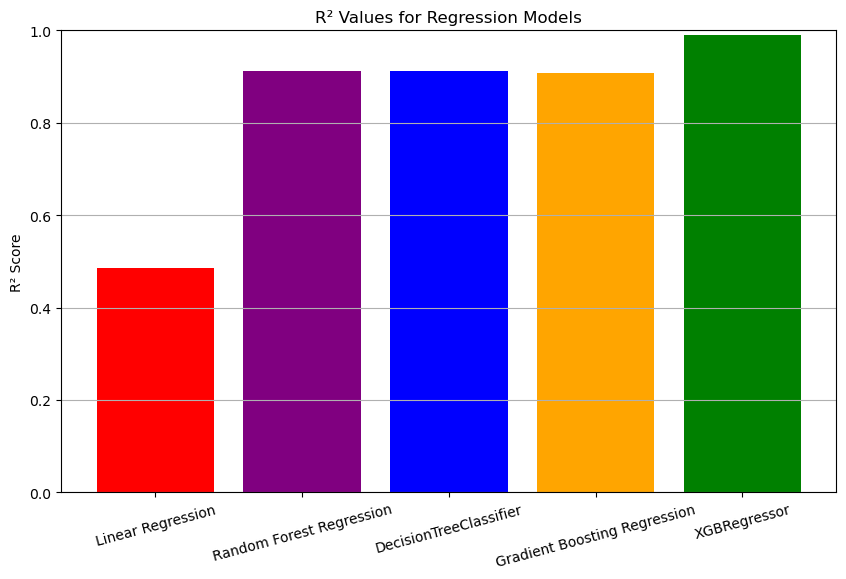

In [67]:
metrics = {
    'Model': ['Linear Regression', 'Random Forest Regression', 'DecisionTreeClassifier', 'Gradient Boosting Regression', 'XGBRegressor'],
    'R2': [0.4849504885884386, 0.9118293574604808, 0.9118293574604808, 0.9079544149446175, 0.9901286952385763]
}

metrics_cars = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
plt.bar(metrics_cars['Model'], metrics_cars['R2'], color=['red', 'purple', 'blue', 'orange', 'green'])
plt.ylim(0, 1)  
plt.title('R² Values for Regression Models')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

In [68]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
}

random_search = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid, n_iter=50, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

random_search.fit(x_train, y_train)

print("Best parameters for XGBoost:", random_search.best_params_)

y_pred = random_search.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
Mean Squared Error: 17697924101.368076
R-squared: 0.9139425432342962


In [70]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Mean Squared Error: 17697924101.368076
R-squared: 0.9139425432342962
